# Spark Streaming with Twitter

_____

* [The Official Documentation about Spark Streaming](http://spark.apache.org/docs/latest/streaming-programming-guide.html#spark-streaming-programming-guide)

____

Let's discuss SparkStreaming!

Spark Streaming is an extension of the core Spark API that enables scalable, high-throughput, fault-tolerant stream processing of live data streams. Data can be ingested from many sources like Kafka, Flume, Kinesis, or TCP sockets, and can be processed using complex algorithms expressed with high-level functions like map, reduce, join and window. Finally, processed data can be pushed out to filesystems, databases, and live dashboards. In fact, you can apply Spark’s machine learning and graph processing algorithms on data streams.

<img src='http://spark.apache.org/docs/latest/img/streaming-arch.png'/>

Keep in mind that a few of these Streamiing Capabilities are limited when it comes to Python, you'll need to reference the documentation for the most up to date information. Also the streaming contexts tend to follow more along with the older RDD syntax, so a few things might seem different than what we are used to seeing, keep that in mind, you'll definitely want to have a good understanding of lambda expressions before continuing with this!

There are SparkSQL modules for streaming: 

http://spark.apache.org/docs/latest/api/python/pyspark.sql.html?highlight=streaming#module-pyspark.sql.streaming

But they are all still listed as experimental, so instead of showing you something that might break in the future, we'll stick to the RDD methods (which is what the documentation also currently shows for streaming).

Internally, it works as follows. Spark Streaming receives live input data streams and divides the data into batches, which are then processed by the Spark engine to generate the final stream of results in batches.

<img src='http://spark.apache.org/docs/latest/img/streaming-flow.png'/>

# Twitter Example
In order to use all of this though, we need to setup a Developer API acocunt with Twitter and create an application to get credentials. Review the video for instructions on how to do this or if you are already familiar with it, just get the credentials from: 

    https://apps.twitter.com/
    
Once you have that you also need to install these:

pip3 install tweepy

pip3 install matplotlib

pip3 install seaborn

pip3 install pandas


Begin by running the TweetRead.py file. Make sure to add your own IP Adress, Port and your credential keys.

In [1]:
import findspark

In [2]:
findspark.init('/home/supattra/spark-3.0.0-preview2-bin-hadoop2.7');

In [3]:
# May cause deprecation warnings, safe to ignore, they aren't errors
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext,SparkSession
from pyspark.sql.functions import desc

In [4]:
my_spark = SparkSession.builder.appName('myApp').getOrCreate()
sc = my_spark.sparkContext

In [5]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(my_spark)

In [6]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

In [7]:
lines = socket_stream.window( 20 )

In [8]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [9]:
def process(time, rdd):  
    try:
        wordsDF = my_spark.createDataFrame(rdd)
        wordsDF = wordsDF.orderBy('count', ascending=False)
        wordsDF.createOrReplaceTempView("tweets")
        wordsCountDF = my_spark.sql("select * from tweets")
        wordsCountDF.show()
    except:
        pass

# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( process ) ) 

__________
### Now run TweetRead.py
__________

In [10]:
ssc.start()    

In [11]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
# Only works for Jupyter Notebooks!
%matplotlib inline 

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    1|
|            #covid19|    1|
|#worldfoodsafetyday.|    1|
|         #foodsafety|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    4|
|            #covid19|    1|
|              #white|    1|
|         #deplorable|    1|
|       #britishvogue|    1|
|        #transparent|    1|
|     #photo_editing…|    1|
|    #covidwebinarsug|    1|
|       #coronavirus?|    1|
|#darjeelingteraid...|    1|
|        #coronavirus|    1|
|#worldfoodsafetyday.|    1|
|         #foodsafety|    1|
|#covid19virusmatt...|    1|
|        #againstexam|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    5|
|         #deplorable|    1|
|        #transparent|    1|
|              #white|    1|
|       #cor

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    4|
|        #coronavirus|    2|
|#bhagodiyouthcong...|    2|
|       #coronavirus?|    1|
|         #saintdrmsg|    1|
|   #masstestingnowph|    1|
|               #mufc|    1|
|  #junkterrorbillnow|    1|
|     #projectbarkada|    1|
|                #nhs|    1|
| #hydroxychloroquine|    1|
|     #boycottlatimes|    1|
+--------------------+-----+



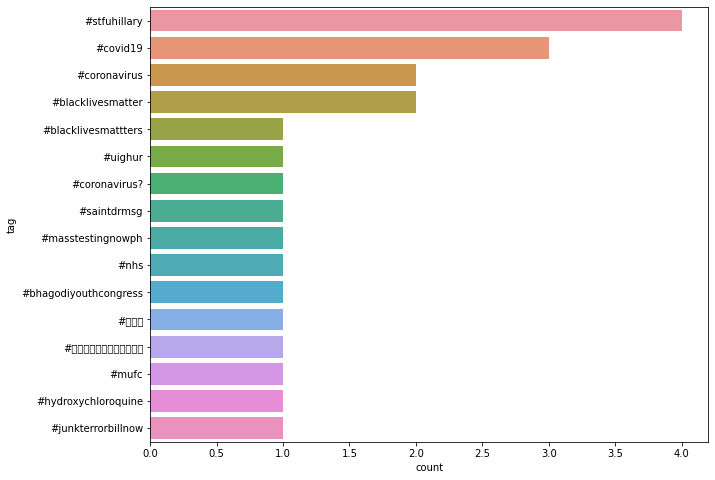

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|            #covid19|    2|
|        #stfuhillary|    1|
|#bhagodiyouthcong...|    1|
|        #coronavirus|    1|
|             #uighur|    1|
|        #georgefloyd|    1|
|            #psyops.|    1|
|              #covid|    1|
|   #socialdistancing|    1|
|     #boycottlatimes|    1|
|     #projectbarkada|    1|
|           #infowars|    1|
|         #using_mask|    1|
|     #lockdownfailed|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|            #covid19|    3|
|             #uighur|    2|
|        #georgefloyd|    1|
|            #psyops.|    1|
|   #socialdistancing|    1|
|            #pmcares|    1|
|              #covid|    1|
|#democratsdividin...|    1|
|        #coronavirus|    1|
|           #infowars|    1|
|         #using_mask|    1|
|     #lockdownfailed|    1|
|             #gender|    1|
|           #

+-------------------+-----+
|                tag|count|
+-------------------+-----+
|       #stfuhillary|    8|
|               #vtu|    2|
|#enhancingparenting|    1|
|#cancelmedicalexams|    1|
|           #covid19|    1|
|           #psyops.|    1|
|       #coronavirus|    1|
|          #pandemic|    1|
|       #georgefloyd|    1|
|          #vtu(that|    1|
|     #signalforhelp|    1|
|        #muhsnashik|    1|
|             #watch|    1|
|             #race…|    1|
|              #dire|    1|
|           #economy|    1|
|      #presidential|    1|
|          #infowars|    1|
+-------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    5|
|                #vtu|    2|
|        #coronavirus|    1|
|        #georgefloyd|    1|
|           #pandemic|    1|
|               #dire|    1|
|            #psyops.|    1|
|#antibioticresist...|    1|
|            #covid19|    1|
|       #presidential|    1|
|     

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    8|
|           #pandemic|    3|
|            #covid19|    3|
|                #nhs|    2|
|           #babygate|    1|
|     #comingtogether|    1|
|        #coronavirus|    1|
|#supportsatishdwi...|    1|
|               #new…|    1|
|#georgefloydprotests|    1|
|                #blm|    1|
|   #rubengutierrez's|    1|
|               #love|    1|
|             #image…|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   14|
|            #covid19|    4|
|           #pandemic|    2|
|                #nhs|    2|
|                #blm|    1|
|               #new…|    1|
|     #comingtogether|    1|
|       #chinesevirus|    1|
|       #coronavirus?|    1|
|     #coronaviruspa…|    1|
|#supportsatishdwi...|    1|
|             #delhi:|    1|
|               #love|    1|
|         #wa

+-------------------+-----+
|                tag|count|
+-------------------+-----+
|       #stfuhillary|    9|
|           #covid19|    3|
|               #st…|    2|
|#enhancingparenting|    1|
|      #coronavirus?|    1|
|          #foxnews…|    1|
|          #pandemic|    1|
|    #weinerslaptop?|    1|
|    #beyondtomorrow|    1|
|             #care…|    1|
| #clintonbodycount?|    1|
|            #uighur|    1|
|    #masstestingnow|    1|
|           #covid1…|    1|
+-------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    8|
|         #saintdrmsg|    2|
|            #covid19|    2|
|           #pandemic|    2|
|     #coronawarriors|    2|
|             #uighur|    1|
|        #coronavirus|    1|
|     #beyondtomorrow|    1|
|#atrocitiesonhind...|    1|
|            #covid1…|    1|
|     #masstestingnow|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    7|
|            #covid19|    3|
|        #coronavirus|    3|
|  #asksuperjuniorkry|    1|
|         #agenda2030|    1|
|            #wwg1wga|    1|
|      #musicaidfest.|    1|
|#promote_all_igno...|    1|
| #enhancingparenting|    1|
|              #qanon|    1|
|              #memes|    1|
|                #nhs|    1|
|          #framelive|    1|
|         #cancelexa…|    1|
|       #oneyeardelta|    1|
|             #uighur|    1|
|            #china's|    1|
|              #siaya|    1|
|         #usikusacco|    1|
|            #kubamba|    1|
+--------------------+-----+
only showing top 20 rows

+----------------+-----+
|             tag|count|
+----------------+-----+
|    #stfuhillary|    8|
|        #covid19|    3|
|   #oneyeardelta|    1|
|         #uighur|    1|
|    #coronavirus|    1|
|            #nhs|    1|
|        #china's|    1|
|#handbacktheflag|    1|
|  

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    9|
|            #covid19|    3|
|             #uighur|    1|
|           #pandemic|    1|
|           #floydflu|    1|
|       #chinesevirus|    1|
|                #blm|    1|
|     #真矢チャンネル|    1|
|      #musicaidfest.|    1|
|             #wakeup|    1|
|               #cdc…|    1|
|          #inoranbar|    1|
|           #nygiants|    1|
|#tipstostrengthen...|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   11|
|            #covid19|    4|
|           #pandemic|    2|
|             #wakeup|    1|
|          #exclusive|    1|
|                 #’s|    1|
|         #protestors|    1|
|#promote_all_coll...|    1|
|       #womenleaders|    1|
|               #arts|    1|
|          #canberra.|    1|
|             #pelosi|    1|
|     #coronawarriors|    1|
|     #cancelvtuexam

+-------------------+-----+
|                tag|count|
+-------------------+-----+
|       #stfuhillary|    5|
|       #coronavirus|    2|
|       #pepperspray|    1|
|           #60mins,|    1|
| #wuhancoronavirus?|    1|
|   #bethechange4usa|    1|
| #asksuperjuniorkry|    1|
|     #safoorazargar|    1|
|    #saratogacounty|    1|
|     #killercuomo’s|    1|
|      #coronavirus?|    1|
|  #johnsonhasfailed|    1|
|               #gas|    1|
|    #bunkerboytrump|    1|
|         #since2011|    1|
|    #silentmajority|    1|
|      #carenotcages|    1|
|#blacktranslivesma…|    1|
|             #fresh|    1|
|     #matchamillion|    1|
+-------------------+-----+
only showing top 20 rows

+-------------------+-----+
|                tag|count|
+-------------------+-----+
|       #stfuhillary|    8|
| #wuhancoronavirus?|    1|
|   #bethechange4usa|    1|
|    #saratogacounty|    1|
|            #uighur|    1|
|       #coronavirus|    1|
|      #coronavirus?|    1|
|  #johnsonhasfailed| 

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   11|
|        #coronavirus|    2|
|             #uighur|    2|
|          #covidー19|    2|
|   #wearesafewithgod|    1|
| #enhancingparenting|    1|
|                #nhs|    1|
|           #pandemic|    1|
|           #floydflu|    1|
|       #christianity|    1|
|          #exclusive|    1|
|              #bigil|    1|
|          #baahubali|    1|
|            #covid19|    1|
|         #bangladesh|    1|
|        #bruce_allen|    1|
|#tipstostrengthen...|    1|
|      #airasiasucks!|    1|
|          #rubengut…|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   14|
|             #uighur|    2|
|          #baahubali|    1|
|           #floydflu|    1|
|       #christianity|    1|
|        #bruce_allen|    1|
|            #covid19|    1|
|              #bigil|    1|
|         #ban

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   13|
| #gopbetrayedamerica|    3|
|                   #|    2|
|        #coronavirus|    1|
|            #covid19|    1|
|   #jamaicatogether:|    1|
|#georgefloydprote...|    1|
|               #icai|    1|
|#gopcorruptionove...|    1|
|#gopcorruptionove...|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   10|
| #gopbetrayedamerica|    3|
|                   #|    2|
|            #covid19|    1|
|               #icai|    1|
|        #coronavirus|    1|
|            #toonami|    1|
|#jojosbizarreadve...|    1|
|#gopcorruptionove...|    1|
|#gopcorruptionove...|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   12|
|             #uighur|    3|
|#jojosbizarreadve...|    1|
|        #co

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   12|
|        #coronavirus|    2|
|        #minneapolis|    1|
|           #protests|    1|
|      #stfuhillary!!|    1|
|           #blogpost|    1|
|           #bill156,|    1|
|        #aarogyasetu|    1|
|           #covid-19|    1|
|         #wearorange|    1|
|     #icairespondnow|    1|
|  #milelegospelsund…|    1|
|            #covid19|    1|
|              #riot?|    1|
|          #covidー19|    1|
| #milelegospelsunday|    1|
|               #stfu|    1|
|        #socialmedia|    1|
|         #pandemic? |    1|
|#postpone_ca_exam...|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    4|
|            #covid19|    2|
|      #stfuhillary!!|    1|
|           #covid-19|    1|
|     #icairespondnow|    1|
|  #milelegospelsund…|    1|
|           #blogpost|    1|
|             

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    9|
| #enhancingparenting|    3|
|           #pandemic|    2|
|                #nhs|    1|
|             #uighur|    1|
|   #breakingqyahnews|    1|
|        #coronavirus|    1|
|    #policebrutality|    1|
|      #mommaimadeit…|    1|
|              #covid|    1|
|             #ufc250|    1|
|            #covid19|    1|
|           #joebiden|    1|
| #studentlivesmatter|    1|
|#returnbeyhadh2so...|    1|
|#worldfoodsafetyday.|    1|
|         #foodsafety|    1|
|            #indycar|    1|
|            #america|    1|
|           #bluefall|    1|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    8|
| #enhancingparenting|    4|
|           #pandemic|    3|
|            #covid19|    2|
|    #policebrutality|    1|
|        #coronavirus|    1|
|  #georgefloydmu

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   11|
|        #coronavirus|    3|
|       #coronavirus?|    2|
|        #maharashtra|    1|
|            #covid19|    1|
|#itsnotaboutgeorg...|    1|
|         #dietitians|    1|
|             #uighur|    1|
|             #canada|    1|
|              #varta|    1|
|                  #…|    1|
|                #ba…|    1|
|#thisistheridetha...|    1|
|            #cdnpoli|    1|
|      #fireandrehire|    1|
|         #babetrayal|    1|
|       #1yearofmodi2|    1|
|          #portland…|    1|
|               #bced|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   11|
|       #coronavirus?|    2|
|             #uighur|    2|
|        #coronavirus|    2|
|        #aarogyasetu|    2|
|         #dietitians|    1|
|  #asksuperjuniorkry|    1|
|                #ba…|    1|
|#atrocitieso

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    6|
|           #pandemic|    3|
|   #blacklivesmatter|    1|
|#aosbarkadahanwit...|    1|
|        #pepperspray|    1|
|   #guaranteedincome|    1|
|       #coronavirus?|    1|
|              #qanon|    1|
|     #medicareforall|    1|
| #mentalhealthcrisis|    1|
|         #agoodstart|    1|
|               #oann|    1|
|            #bbcnews|    1|
|      #soros-#antifa|    1|
|   #johnsonhasfailed|    1|
|        #coronavirus|    1|
|            #mental…|    1|
|            #covid19|    1|
|                #kai|    1|
|            #traitor|    1|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    9|
|           #pandemic|    2|
|         #agoodstart|    1|
|               #oann|    1|
|              #qanon|    1|
|   #johnsonhasfailed|    1|
|            #bbc

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    6|
|            #covid19|    2|
|        #coronavirus|    1|
|            #science|    1|
| #enhancingparenting|    1|
|                #nhs|    1|
|           #pandemic|    1|
|          #covid2019|    1|
|          #bluestate|    1|
|#atrocitiesonhind...|    1|
|     #coronawarriors|    1|
|      #deforestation|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    4|
|            #covid19|    1|
|                #nhs|    1|
|          #bluestate|    1|
|          #covid2019|    1|
|#atrocitiesonhind...|    1|
|           #pandemic|    1|
|      #deforestation|    1|
|        #ancmustfall|    1|
|              #gtfoh|    1|
|#tipstostrengthen...|    1|
|     #annauniversity|    1|
|      #desertlocusts|    1|
+--------------------+-----+

+--------------------+-----+
|           

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    9|
|            #covid19|    3|
|             #uighur|    2|
|        #coronavirus|    2|
|#worldenvironmentday|    1|
|        #georgefloyd|    1|
|#दवा_से_पहले_स्कू...|    1|
|            #psyops…|    1|
|           #covid_19|    1|
|              #pti's|    1|
|      #noschoolnofee|    1|
|#worldfoodsafetyday,|    1|
|           #covid19…|    1|
|           #infowars|    1|
|   #humantrafficking|    1|
|#noschooltillcovid19|    1|
|              #q1432|    1|
|              #q4429|    1|
|       #coronaupdate|    1|
|          #education|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    9|
|#worldfoodsafetyday,|    3|
|            #covid19|    2|
|        #coronavirus|    2|
|        #georgefloyd|    1|
|            #psyops…|    1|
|             #uighur|    1|
|            

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    9|
|#worldfoodsafetyday,|    2|
|             #uighur|    1|
|#aosbarkadahanwit...|    1|
|    #zelenkoprotocol|    1|
|                 #hr|    1|
| #mentalhealthcrisis|    1|
|            #mental…|    1|
|            #covid19|    1|
|     #employeesafety|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   12|
| #mentalhealthcrisis|    1|
|            #covid19|    1|
|            #mental…|    1|
|                 #hr|    1|
|       #chinesevirus|    1|
|           #pandemic|    1|
|        #glowtronics|    1|
|     #employeesafety|    1|
|               #mask|    1|
|#worldfoodsafetyday,|    1|
|#tipstostrengthen...|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    9|
|           

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    8|
|            #covid19|    2|
|#worldfoodsafetyday,|    2|
|          #baahubali|    1|
|            #packag…|    1|
|           #bill156,|    1|
|           #covid19.|    1|
|      #musicaidfest.|    1|
|          #inoranbar|    1|
|             #auspol|    1|
|     #whitesupremacy|    1|
|#राजस्थान_सरकार_छ...|    1|
|             #नर्सों|    1|
|              #bigil|    1|
|     #annauniversity|    1|
|     #真矢チャンネル|    1|
|#kiitkissfightsco...|    1|
+--------------------+-----+

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|   12|
|            #covid19|    2|
|     #annauniversity|    2|
|        #coronavirus|    2|
|           #pandemic|    2|
|#worldfoodsafetyday,|    2|
|#राजस्थान_सरकार_छ...|    1|
|             #नर्सों|    1|
|             #auspol|    1|
|                #wi…|    1|
|#generalpromotion..

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    4|
|                #st…|    1|
|           #covid-19|    1|
|           #pandemic|    1|
|            #covid19|    1|
|     #unavidacontigo|    1|
|        #wuhanvirus,|    1|
|        #coronavirus|    1|
| #enhancingparenting|    1|
| #mentalhealthcrisis|    1|
|            #mental…|    1|
|           #cannabis|    1|
|  #asksuperjuniorkry|    1|
|    #flattenthecurve|    1|
|   #socialdistancing|    1|
|              #icmr,|    1|
|      #musicaidfest.|    1|
|#savekewadiya_sav...|    1|
|                #ccp|    1|
|                 #hr|    1|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|                 tag|count|
+--------------------+-----+
|        #stfuhillary|    3|
|        #coronavirus|    2|
|#worldfoodsafetyday,|    2|
|          #inoranbar|    1|
|            #mental…|    1|
|  #asksuperjuniorkry|    1|
|   #socialdistan

In [12]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    #sns.plt.figure( figsize = ( 10, 8 ) )
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    #sns.plt.show()
    #plt.figure( figsize = ( 10, 8 ) )
    plt.show()
    count = count + 1

In [13]:
ssc.stop()